In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando e Analisando DataSet

In [3]:
df = pd.read_csv('responses.csv')

In [4]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [5]:
musical_data = df[['Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']]

In [6]:
musical_data = musical_data.fillna(1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 3))
scaler.fit(musical_data)
musical_data_scaled = scaler.transform(musical_data)

In [8]:
musical_data_scaled = pd.DataFrame(musical_data_scaled, columns=musical_data.columns)

In [9]:
musical_data_scaled.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,0.0,-1.0,0.0,0.0,-1.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,0.0,-1.0,-1.0,-1.0,0.0,1.0,3.0,2.0,2.0,-1.0,1.0,-1.0,2.0,2.0,0.0,-1.0,-1.0
2,0.0,0.0,1.0,2.0,3.0,1.0,3.0,1.0,2.0,-1.0,2.0,1.0,3.0,3.0,3.0,-1.0,1.0
3,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,2.0,0.0,0.0,-1.0,0.0,3.0,-1.0,0.0,-1.0
4,2.0,1.0,0.0,2.0,1.0,3.0,1.0,-1.0,0.0,3.0,1.0,0.0,-1.0,0.0,2.0,0.0,0.0


### Agglomerative Clustering

#### Dendrograma

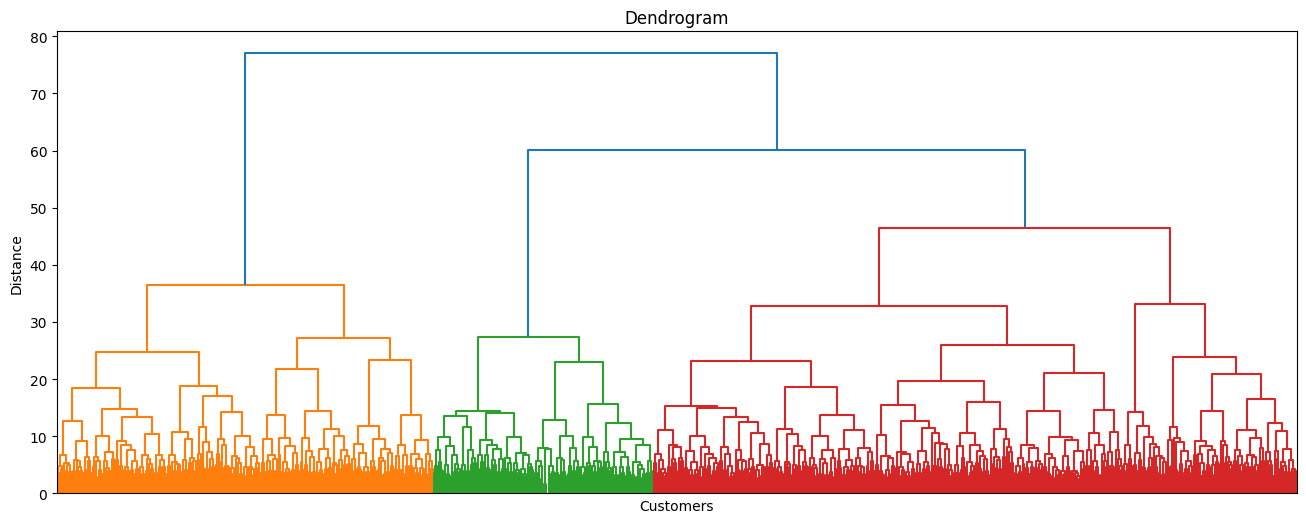

In [14]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,6))
dendrograma = sch.dendrogram(sch.linkage(musical_data_scaled, method='ward'), leaf_font_size=8, color_threshold=56)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.xticks([])
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

agg_cl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cl.fit(musical_data_scaled)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [16]:
dataset_aggcl = musical_data_scaled.copy()
dataset_aggcl['classes_aggcl'] = agg_cl.labels_
dataset_aggcl['classes_aggcl'].value_counts()

classes_aggcl
0    524
1    307
2    179
Name: count, dtype: int64

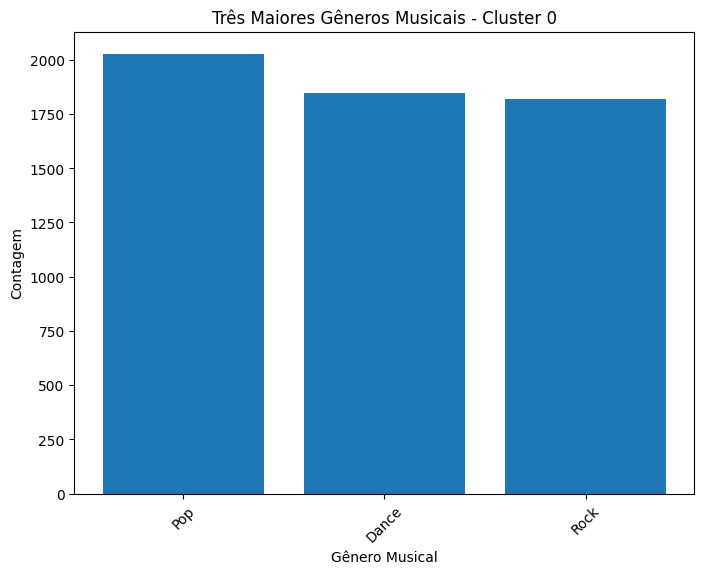

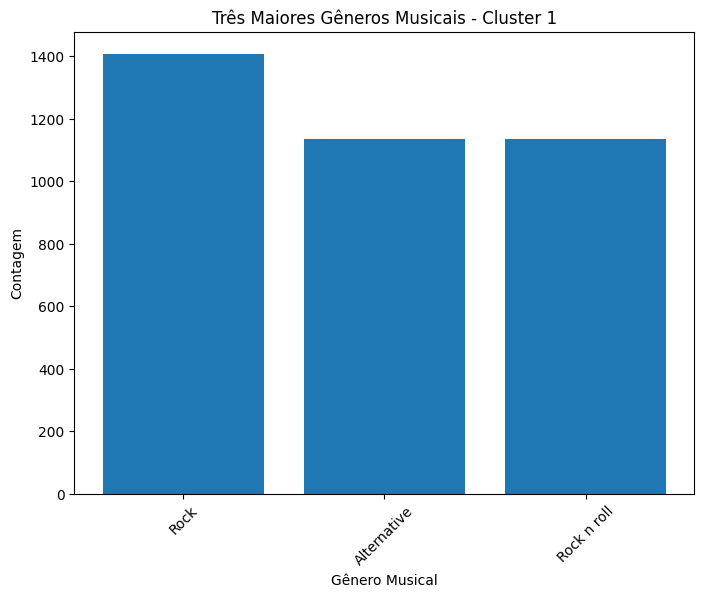

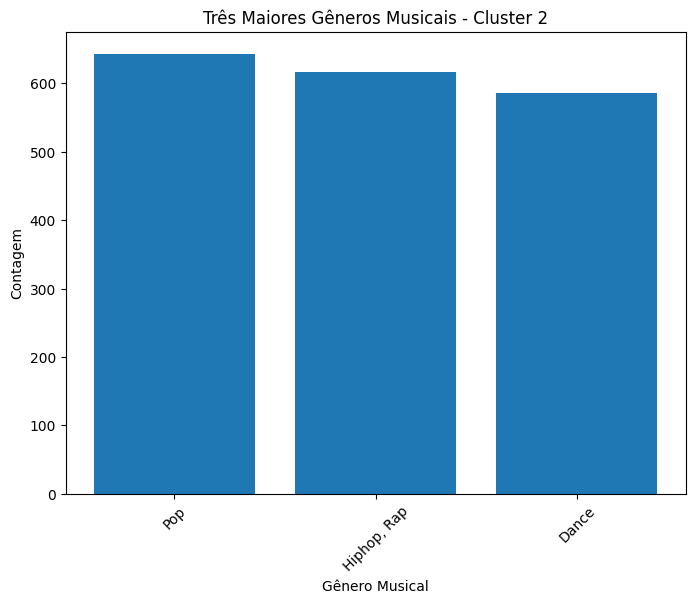

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tem os clusters em 'agg_cl.labels_'

# Copie os dados originais (não escalados) e adicione as labels de clusters
dataset_with_clusters = musical_data.copy()
dataset_with_clusters['clusters'] = agg_cl.labels_

# Itere pelos clusters e crie um gráfico para cada um deles
for cluster in range(3):
    # Filtra os dados para o cluster atual
    cluster_data = dataset_with_clusters[dataset_with_clusters['clusters'] == cluster]
    
    # Inicialize um dicionário para contar a contagem de cada gênero musical
    genre_counts = {}
    
    # Conta a ocorrência de cada gênero musical em todo o cluster
    for genre in musical_data.columns:
        genre_counts[genre] = cluster_data[genre].sum()
    
    # Selecione os três gêneros musicais mais populares
    top_genres = sorted(genre_counts, key=genre_counts.get, reverse=True)[:3]
    
    # Crie um gráfico de barras para o cluster atual com os três gêneros mais populares
    plt.figure(figsize=(8, 6))
    plt.bar(top_genres, [genre_counts[genre] for genre in top_genres])
    plt.xlabel('Gênero Musical')
    plt.ylabel('Contagem')
    plt.title(f'Três Maiores Gêneros Musicais - Cluster {cluster}')
    plt.xticks(rotation=45)
    plt.show()


In [55]:
import pickle
# Especifique o nome do arquivo .pkl onde você deseja salvar o modelo
nome_arquivo_pkl = "modelo.pkl"

# Salve o modelo no arquivo .pkl
with open(nome_arquivo_pkl, 'wb') as arquivo:
    pickle.dump(agg_cl, arquivo)